# Another Quick Hack: change the alpha of the streamline warps

This also validates that can load the intermidiate variables

In [17]:
import numpy as np
import matplotlib.pyplot as plt

from AFQ import api
import AFQ.data as afd

import os.path as op

import nibabel as nib

from dipy.io.streamline import load_tractogram
from dipy.tracking.streamline import set_number_of_points, values_from_volume

In [9]:
hcp_subjects = ['103818', '105923']

def get_hcp_afq(dataset_name):
    afq = api.AFQ(
        bids_path=op.join(afd.afq_home, dataset_name),
        dmriprep='dmriprep'
    )
    
    display(afq.data_frame)
    
    return afq

hcp_test_afq = get_hcp_afq('HCP_1200')

# hcp_retest_afq = get_hcp_afq('hcp_retest')

# bundle_names = [*hcp_retest_afq.bundle_dict]
bundle_names = ['ARC_L', 'ARC_R', 'CST_L', 'CST_R', 'FP'] 
n_points = 100

INFO:dipy.data.fetcher:Dataset is already in place. If you want to fetch it again please first remove the folder /Users/bloomdt/AFQ_data/templates 
INFO:dipy.data.fetcher:Dataset is already in place. If you want to fetch it again please first remove the folder /Users/bloomdt/AFQ_data/callosum_templates 
/Users/bloomdt/anaconda/envs/dtw/lib/python3.8/site-packages/bids/layout/models.py:98: FutureWarning: The 'extension' entity currently excludes the leading dot ('.'). As of version 0.14.0, it will include the leading dot. To suppress this warning and include the leading dot, use `bids.config.set_option('extension_initial_dot', True)`.
  warnings.warn("The 'extension' entity currently excludes the leading dot ('.'). "


,subject,dwi_file,bvec_file,bval_file,custom_tract,reg_subject,ses,timing,results_dir,gtab,dwi_affine,dwi_img
0,100307,/Users/bloomdt/AFQ_data/HCP_1200/derivatives/d...,/Users/bloomdt/AFQ_data/HCP_1200/derivatives/d...,/Users/bloomdt/AFQ_data/HCP_1200/derivatives/d...,None,None,01,"{'Tractography': 0, 'Registration': 0, 'Segmen...",/Users/bloomdt/AFQ_data/HCP_1200/derivatives/a...,<dipy.core.gradients.GradientTable object at 0...,"[[-1.25, 0.0, 0.0, 90.0], [0.0, 1.25, 0.0, -12...",<class 'nibabel.nifti1.Nifti1Image'>\ndata sha...
1,103818,/Users/bloomdt/AFQ_data/HCP_1200/derivatives/d...,/Users/bloomdt/AFQ_data/HCP_1200/derivatives/d...,/Users/bloomdt/AFQ_data/HCP_1200/derivatives/d...,None,None,01,"{'Tractography': 0, 'Registration': 0, 'Segmen...",/Users/bloomdt/AFQ_data/HCP_1200/derivatives/a...,<dipy.core.gradients.GradientTable object at 0...,"[[-1.25, 0.0, 0.0, 90.0], [0.0, 1.25, 0.0, -12...",<class 'nibabel.nifti1.Nifti1Image'>\ndata sha...
2,105923,/Users/bloomdt/AFQ_data/HCP_1200/derivatives/d...,/Users/bloomdt/AFQ_data/HCP_1200/derivatives/d...,/Users/bloomdt/AFQ_data/HCP_1200/derivatives/d...,None,None,01,"{'Tractography': 0, 'Registration': 0, 'Segmen...",/Users/bloomdt/AFQ_data/HCP_1200/derivatives/a...,<dipy.core.gradients.GradientTable object at 0...,"[[-1.25, 0.0, 0.0, 90.0], [0.0, 1.25, 0.0, -12...",<class 'nibabel.nifti1.Nifti1Image'>\ndata sha...


In [10]:
def get_subject_iloc(afq, subject):
    iloc = afq.data_frame.index[afq.data_frame['subject'] == subject][0]
    
    return iloc

def get_subject_scalar_data(afq, subject, scalar):
    iloc = get_subject_iloc(afq, subject)
    
    scalar_filename = afq._get_fname(
        afq.data_frame.iloc[iloc],
        f'_model-{scalar}.nii.gz'
    )

    scalar_data = nib.load(scalar_filename).get_fdata()
    
    return scalar_data

def get_subject_bundle_tractogram(afq, subject, bundle_name):
    iloc = get_subject_iloc(afq, subject)
    
    results_dir = afq.data_frame.iloc[iloc]['results_dir']
    
    fname = op.split(
        afq._get_fname(
            afq.data_frame.iloc[iloc],
            f'-{bundle_name}'
            f'_tractography.trk',
            include_track=True,
            include_seg=True
        )
    )

    tractogram_filename = op.join(results_dir, 'clean_bundles', fname[1])
    
    tractogram = load_tractogram(tractogram_filename, 'same')
    
    return tractogram

In [24]:
afq = hcp_test_afq
afq_name = 'test'

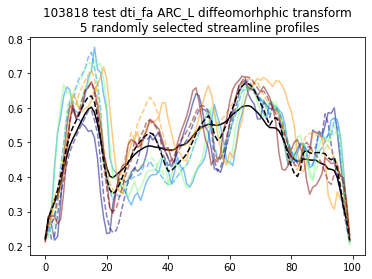

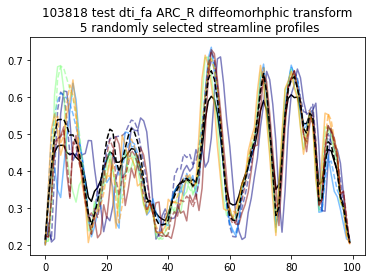

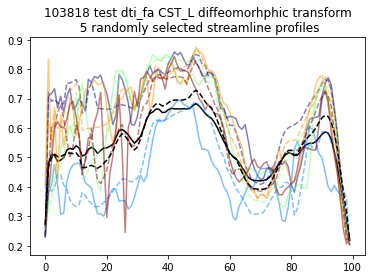

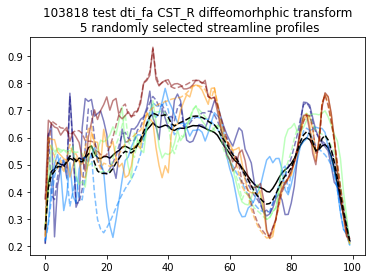

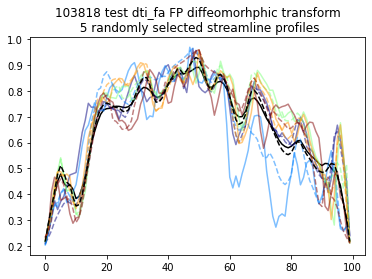

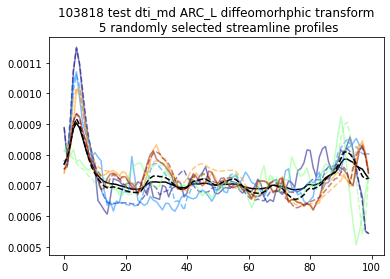

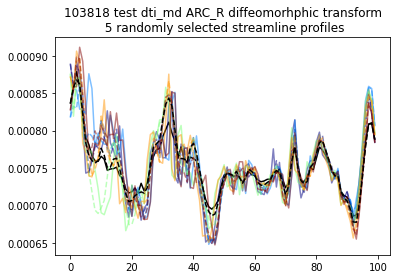

103818 test dti_md CST_L no warp files!
103818 test dti_md CST_R no warp files!
103818 test dti_md FP no warp files!
105923 test dti_fa ARC_L no warp files!
105923 test dti_fa ARC_R no streamlines!
105923 test dti_fa CST_L no warp files!
105923 test dti_fa CST_R no warp files!
105923 test dti_fa FP no warp files!
105923 test dti_md ARC_L no warp files!
105923 test dti_md ARC_R no streamlines!
105923 test dti_md CST_L no warp files!
105923 test dti_md CST_R no warp files!
105923 test dti_md FP no warp files!


In [30]:
for subject in hcp_subjects:
    for scalar_name in ['dti_fa', 'dti_md']:
        for bundle_name in bundle_names:
            tractogram = get_subject_bundle_tractogram(afq, subject, bundle_name)
            
            f_name = f'HCP_{subject}_{afq_name}_{scalar_name}_{bundle_name}_transformed_values.npy'
            f_name2 = f'HCP_{subject}_{afq_name}_{scalar_name}_{bundle_name}_mean_transformed_values.npy'
            
            if len(tractogram.streamlines) == 0:
                print(subject, afq_name, scalar_name, bundle_name, 'no streamlines!')
            elif op.isfile(f_name):
                alpha = 0.5
                fgarray = set_number_of_points(tractogram.streamlines, n_points)

                transformed_values = np.load(f_name)

                scalar_data = get_subject_scalar_data(afq, subject, scalar_name)
                values = np.array(values_from_volume(scalar_data, fgarray, tractogram.affine))
                mean_values = np.mean(values, axis=0)

                plt.figure()
                plt.plot(mean_values, label='bundle $\mu$', c='k')

                n_streamlines = 5
                random_streamline_idxs = np.random.choice(len(tractogram.streamlines), size=n_streamlines)
                colors = iter(plt.cm.jet(np.linspace(0,1,n_streamlines)))

                for streamline_idx in range(len(tractogram.streamlines)):
                    if streamline_idx in random_streamline_idxs:
                        c=next(colors)
                        plt.plot(transformed_values[streamline_idx], label='post', color=c,linestyle='dashed', alpha=alpha)
                        plt.plot(values[streamline_idx], label='pre', color=c, alpha=alpha)

                mean_transformed_values = np.load(f_name2)
                plt.plot(mean_transformed_values.T, c='k', label='bundle $\mu^{\prime}$', linestyle='dashed')
                plt.title(f'{subject} {afq_name} {scalar_name} {bundle_name} diffeomorhphic transform\n {n_streamlines} randomly selected streamline profiles')
                plt.show()
            else:
                print(subject, afq_name, scalar_name, bundle_name, 'no warp files!')